In [7]:
import WAV
import DSP
import PyPlot; plt = PyPlot
import CMF; cmf = CMF

CMF

### Load data

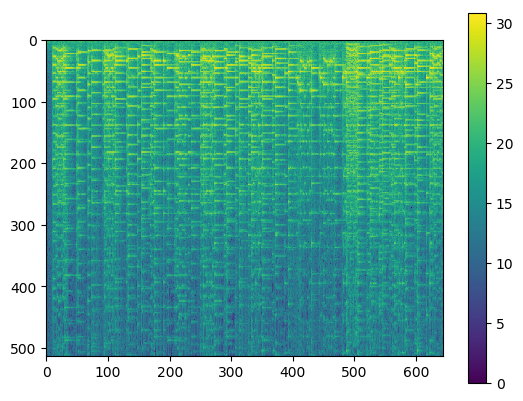

In [8]:
include("../datasets/audio.jl")

spect = piano()

plt.imshow(spect)
plt.grid(false)
plt.colorbar()
plt.show()

### Fit separable algorithm

In [18]:
K = 5
L = 25

r = cmf.fit_cnmf(spect, K=K, L=L, alg=:sep);

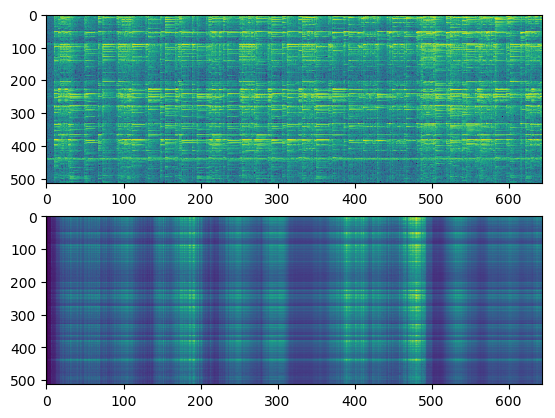

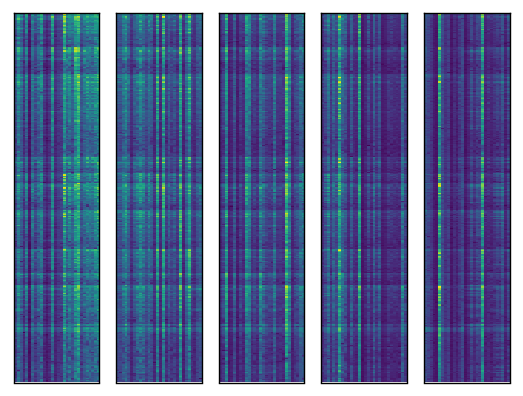

(Figure(PyObject <Figure size 640x480 with 5 Axes>), PyObject[PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f46dfdb6f60>, PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f46dff72860>, PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f46e81f0630>, PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f46e80e5eb8>, PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f46ea37f668>])

In [19]:
cmf.plot_reconstruction(r)
cmf.plot_Ws(r)

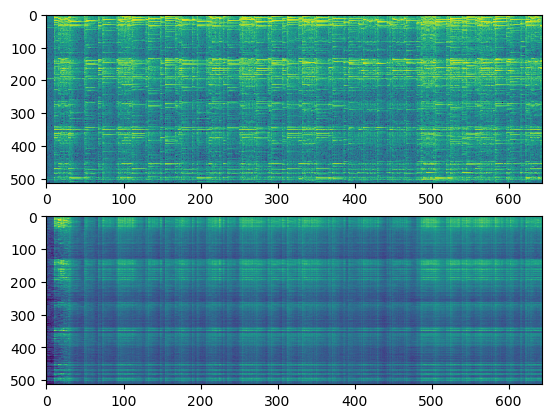

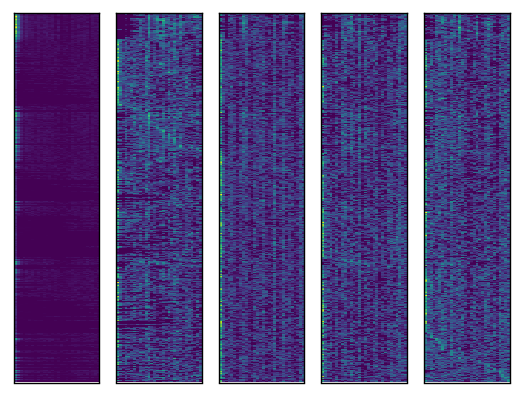

(Figure(PyObject <Figure size 640x480 with 5 Axes>), PyObject[PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f46dfc66898>, PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f46dfc0fdd8>, PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f46dfbbf390>, PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f46dfbe7908>, PyObject <matplotlib.axes._subplots.AxesSubplot object at 0x7f46dfb90e80>])

In [21]:
rh = cmf.fit_cnmf(spect, K=K, L=L, alg=:hals, max_time=5, max_itr=Inf)

cmf.plot_reconstruction(rh)
cmf.plot_Ws(rh)

In [25]:
# rsh = cmf.fit_cnmf(
#     spect, K=K, L=L, alg=:hals, 
#     max_time=5, max_itr=Inf, initW=r.W, initH=r.H
# )

# cmf.plot_reconstruction(rsh)
# cmf.plot_Ws(rsh)

println("Sep Train: ", cmf.evaluate_mse(rsh))
println("HALS Train: ", cmf.evaluate_mse(rh))

Sep Train: 0.14071684679960994
HALS Train: 0.1385777735533031
